In [1]:
import numpy as n
import matplotlib.pyplot as p
import matplotlib.image as mpimg
import pandas as pd
from mplsoccer.pitch import Pitch
from mplsoccer import Sbopen
import seaborn as sns

In [2]:
# using this datafrem
krrr = pd.DataFrame({'name':['sbu', 'bu', 'sbu', 'sbu', 'na', 'nas', 'na', 'nas', 'bu', 'bu', 'sbu', 'nas', 'nas', 'na', 'sbu'],
                     'x':   [10,     112,  56,    72,    22,   114,   32,   109,    44,  101,  98,    100,   103,   75,   86],
                     'y':   [43,     45,   66,    58,    66,   68,    71,   38,     22,  72,   50,    66,    30,    11,   19],
                     'xend':[25,     116,  73,    57,    55,   92,    40,   103,    66,  90,   100,   73,    85,    100,  71],
                     'yend':[45,     55,   79,    60,    48,   73,    48,   70,     80,  80,   31,    24,    19,    27,   22]}
                    )
krrr

,name,x,y,xend,yend
0,sbu,10,43,25,45
1,bu,112,45,116,55
2,sbu,56,66,73,79
3,sbu,72,58,57,60
4,na,22,66,55,48
5,nas,114,68,92,73
6,na,32,71,40,48
7,nas,109,38,103,70
8,bu,44,22,66,80
9,bu,101,72,90,80


In [5]:
# array consists every name
saha = krrr['name'].unique()
saha

array(['sbu', 'bu', 'na', 'nas'], dtype=object)

Text(0.5, 0.98, 'Pass Map Sbubu-Nanas')

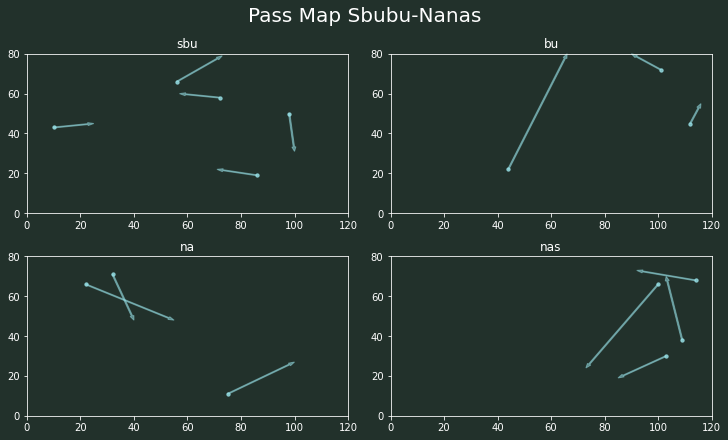

In [6]:
p.style.use('dark_background')
fig, ax = p.subplots(2,2,
                       figsize=(10, 6),
                       constrained_layout=True)
fig.set_facecolor('#22312b')
p.setp(ax, xlim=(0,120), ylim=(0,80))
#ax[0,0].scatter(1,2)
#ax[0,1].set_title('lalala')
#len(ax)
for nem, no in zip(saha, ax.flat):
    no.set_title(nem,color='white')
    no.set_facecolor('#22312b')
    player=krrr.loc[krrr.name==nem].reset_index()
    no.scatter(player.x, player.y, color = "#97e0e6", alpha = 0.8, s=11)#
    player['dx']=player['xend']-player['x']
    player['dy']=player['yend']-player['y']
    for s in range(len(player['x'])):
        no.arrow(player.x[s], player.y[s], player.dx[s], player.dy[s],
                width=.5, alpha  = .5, zorder=0,
                color = '#97e0e6',
                length_includes_head=True,
                clip_on=False)
fig.suptitle('Pass Map Sbubu-Nanas', size=20, color='white')

Text(0.5, 0.98, 'Pass Map Sbubu-Nanas')

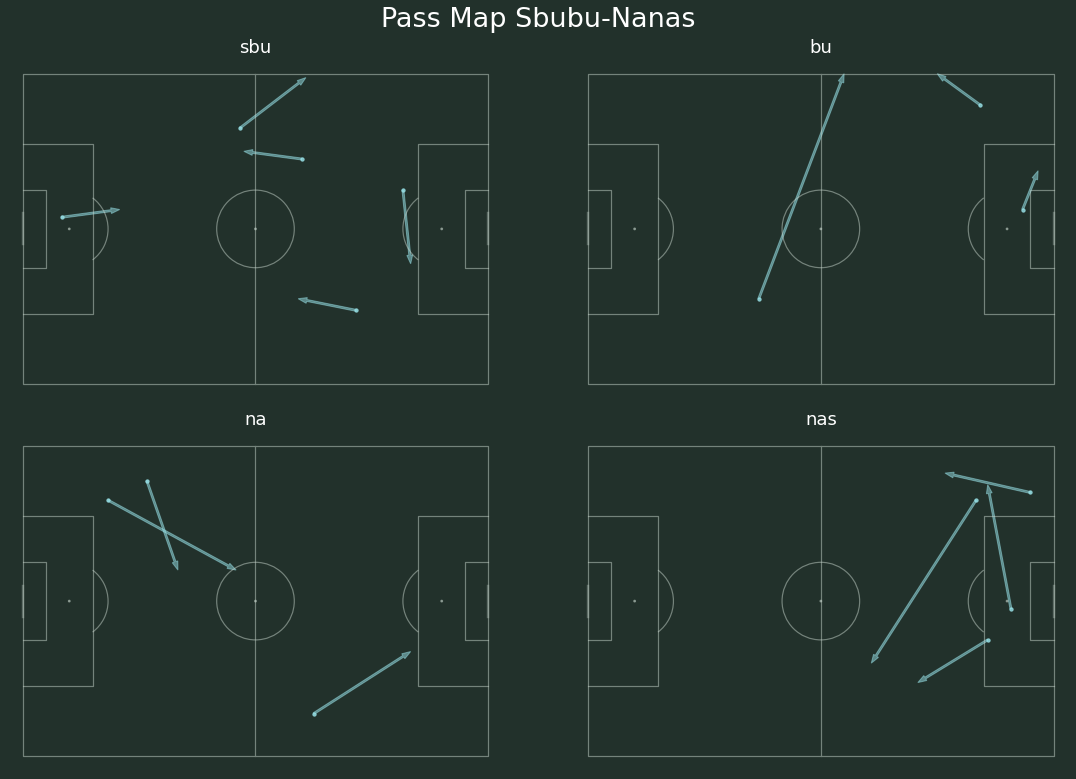

In [44]:
# PITCH
ptc, ax = pitch.draw(nrows=2, ncols=2, figsize=(16, 11))
ptc.set_facecolor('#22312b')
pitch = Pitch(pitch_type='statsbomb', #orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc',
              line_alpha=.5, linewidth=1.2, goal_alpha=.35, 
              #figsize=(13, 8),
              #axis=True, label=True,
             )
for nem, no in zip(saha, ax.flat):
    no.set_title(nem,color='white',size=18)
    no.set_facecolor('#22312b')
    no.invert_yaxis()
    player=krrr.loc[krrr.name==nem].reset_index()
    no.scatter(player.x, player.y, color = "#97e0e6", alpha = 0.8, s=11)#
    player['dx']=player['xend']-player['x']
    player['dy']=player['yend']-player['y']
    for s in range(len(player['x'])):
        no.arrow(player.x[s], player.y[s], player.dx[s], player.dy[s],
                width=.5, alpha  = .5, zorder=0,
                color = '#97e0e6',
                length_includes_head=True,
                clip_on=False)
ptc.suptitle('Pass Map Sbubu-Nanas', size=27)

# Data beneran

In [5]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(2302764)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4648 non-null   object 
 1   index                           4648 non-null   int64  
 2   period                          4648 non-null   int64  
 3   timestamp                       4648 non-null   object 
 4   minute                          4648 non-null   int64  
 5   second                          4648 non-null   int64  
 6   possession                      4648 non-null   int64  
 7   duration                        3452 non-null   float64
 8   match_id                        4648 non-null   int64  
 9   type_id                         4648 non-null   int64  
 10  type_name                       4648 non-null   object 
 11  possession_team_id              4648 non-null   int64  
 12  possession_team_name            46

In [6]:
passes = df.loc[df['player_name'] == 'Steven Gerrard'].loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')
passes

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,block_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,pass_no_touch,block_save_block,foul_committed_card_id,foul_committed_card_name,shot_redirect,block_deflection
id,,,,,,,,,,,,,,,,,,,,,
bf5e97ae-6148-423b-94d7-7dde5c640695,11,1,00:00:02.733000,0,2,2,1.765321,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8dd13064-e935-423d-bf9f-9c1413e8594e,51,1,00:01:51.236000,1,51,5,1.768537,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989b70cd-4e13-4612-8aaf-fa0433b8d4f8,92,1,00:02:41.907000,2,41,8,0.829086,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883f6fb5-e598-4fe4-84a4-99dfa08bc5b7,124,1,00:03:45.470000,3,45,11,2.603057,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361b62ce-a3c1-4caf-b973-d344e7539d8b,158,1,00:04:53.326000,4,53,17,2.398681,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44d9cd48-3526-4eb8-b970-679839fca631,4472,4,00:11:19.863000,116,19,282,2.204598,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94e82aff-6454-4b1a-a4c7-28d5ba75e69b,4486,4,00:11:34.922000,116,34,282,1.523581,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4598133f-53b0-40e4-871b-608ae0a77bb8,4574,4,00:14:07.266000,119,7,290,4.414458,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nan=passes.notnull()
#nan.head(3)

In [8]:
for cx, i in zip(nan, passes):
    if nan[cx].any()==False:
        #print (cx)
        passes=passes.drop(columns=cx)
passes.head(3)

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,under_pressure,pass_cross,pass_assisted_shot_id,technique_id,technique_name,off_camera,pass_switch,pass_shot_assist,aerial_won,pass_deflected
id,,,,,,,,,,,,,,,,,,,,,
bf5e97ae-6148-423b-94d7-7dde5c640695,11,1,00:00:02.733000,0,2,2,1.765321,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8dd13064-e935-423d-bf9f-9c1413e8594e,51,1,00:01:51.236000,1,51,5,1.768537,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989b70cd-4e13-4612-8aaf-fa0433b8d4f8,92,1,00:02:41.907000,2,41,8,0.829086,2302764,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
offside=passes.loc[passes['outcome_name']=='Pass Offside']
outp=passes.loc[passes['outcome_name']=='Out']
clearance=passes.loc[passes['outcome_name']=='Injury Clearance']
unsc=passes.loc[passes['outcome_name']=='Incomplete']
teuing=passes.loc[passes['outcome_name']=='Unknown']
teuing
# ctt passoffside = 0, out = ada 3, clearance = 0, unsucces = 12, unknown = 0

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,under_pressure,pass_cross,pass_assisted_shot_id,technique_id,technique_name,off_camera,pass_switch,pass_shot_assist,aerial_won,pass_deflected
id,,,,,,,,,,,,,,,,,,,,,


Text(109, 82, 'StatsBomb')

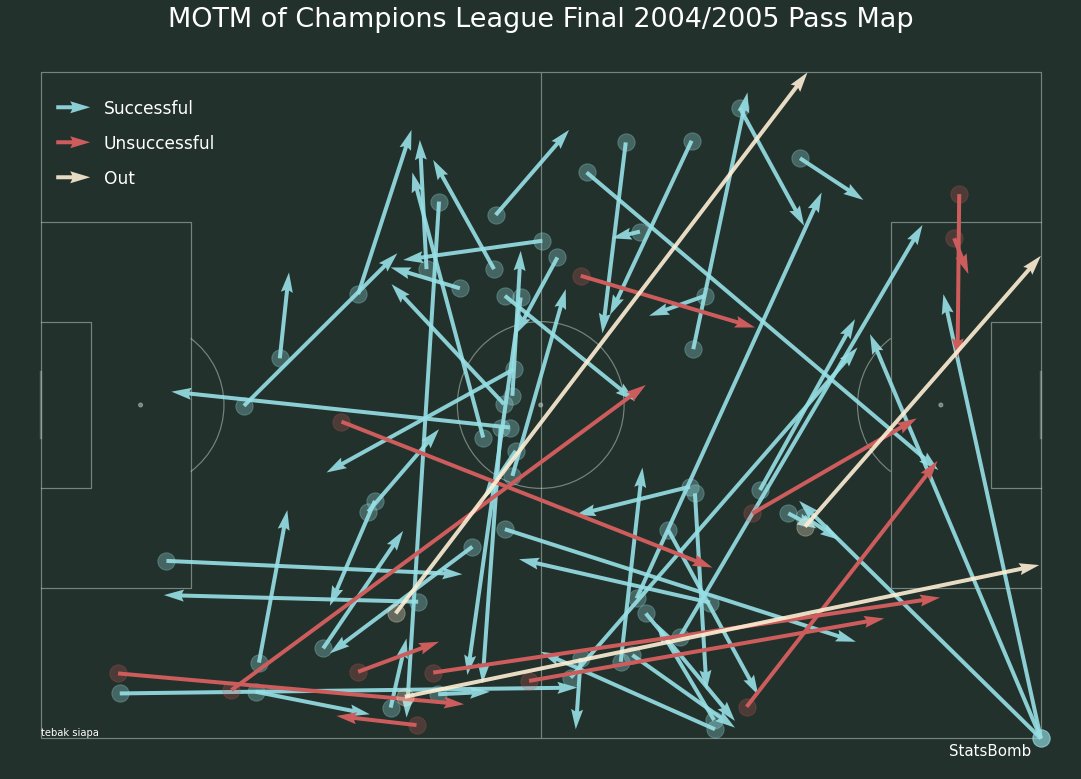

In [10]:
# PITCH
pitch = Pitch(pitch_type='statsbomb', #orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc',
              line_alpha=.5, linewidth=1.2, goal_alpha=.35, 
              #figsize=(13, 8),
              #axis=True, label=True,
             )
ptc, ax = pitch.draw(figsize=(16, 11))
ptc.set_facecolor('#22312b')

#success pass
scsp= passes.loc[passes['outcome_name']!='Incomplete'].loc[passes['outcome_name']!='Out']
pitch.arrows(scsp.x, scsp.y,
            scsp.end_x, scsp.end_y, alpha = 0.9, color = "#97e0e6", ax=ax, label='Successful')
pitch.scatter(scsp.x, scsp.y, alpha = 0.3, s = 300, color = "#97e0e6", ax=ax)
#unsuccess pass
pitch.arrows(unsc.x, unsc.y,
            unsc.end_x, unsc.end_y, alpha = 1, color = "indianred", ax=ax, label='Unsuccessful')
pitch.scatter(unsc.x, unsc.y, alpha = 0.25, s = 300, color = "indianred", ax=ax)
#out
pitch.arrows(outp.x, outp.y,
            outp.end_x, outp.end_y, alpha = 0.9, color = "#ffefd5", ax=ax, label='Out')
pitch.scatter(outp.x, outp.y, alpha = 0.3, s = 300, color = "#ffefd5", ax=ax)

# LEGEND
ax.legend(loc='upper left', bbox_to_anchor=(0.03,.94),
          borderpad=0.5, edgecolor='#22312b',fancybox=True, framealpha=2,
          fontsize=17, labelcolor='white', labelspacing=1,
          facecolor='#22312b')#fontcolor='white'

# TITLE AND DETAILS
#ptc.suptitle('Steven Gerrard Champions League Final 2004/2005 Pass Map', size=27, color='white')
ptc.suptitle('MOTM of Champions League Final 2004/2005 Pass Map', size=27, color='white')
ax.text(s='tebak siapa', x=.1, y=79.6, color='white')
ax.text(s='StatsBomb', x=120-11, y=82, color='white', size=15)
# watermark
#statsbomb = mpimg.imread('sbicon.png')
#ptc.figimage(statsbomb, 0, 0, zorder=3, alpha=.5, resize=(.001,.001))